In [18]:
import statsmodels
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
# import the libraries
import datetime
%matplotlib inline
import matplotlib as mpl
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
# Set figure size to (14,6)

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.ar_model import ar_select_order, AutoReg

plt.rcParams['figure.figsize'] = (14,6)

In [3]:
#pip install statsmodels

In [4]:
df = pd.read_csv('data_remainder_alex.csv', index_col = 0, parse_dates = True)

In [32]:
df.head(5)
df['timestep'] = list(range(len(df)))
df['log_remainder'] = np.log10(df['remainder'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(1000.0, 1500.0)

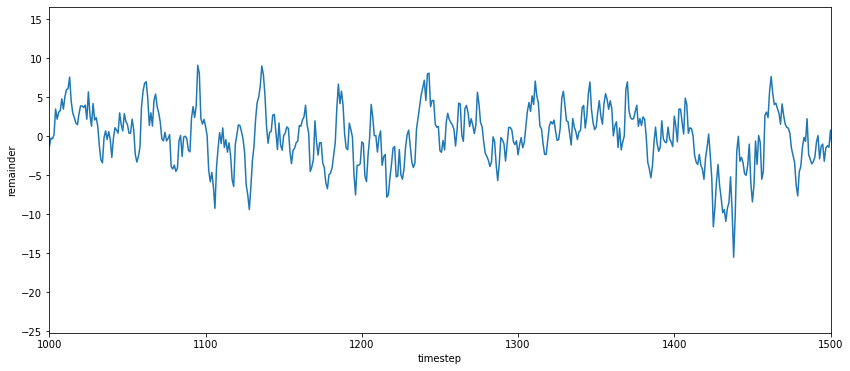

In [6]:
sns.lineplot(x = df['timestep'], y =df['remainder'])
plt.xlim(1000,1500)

Text(0.5, 1.0, 'Title of the logarithmic remainder')

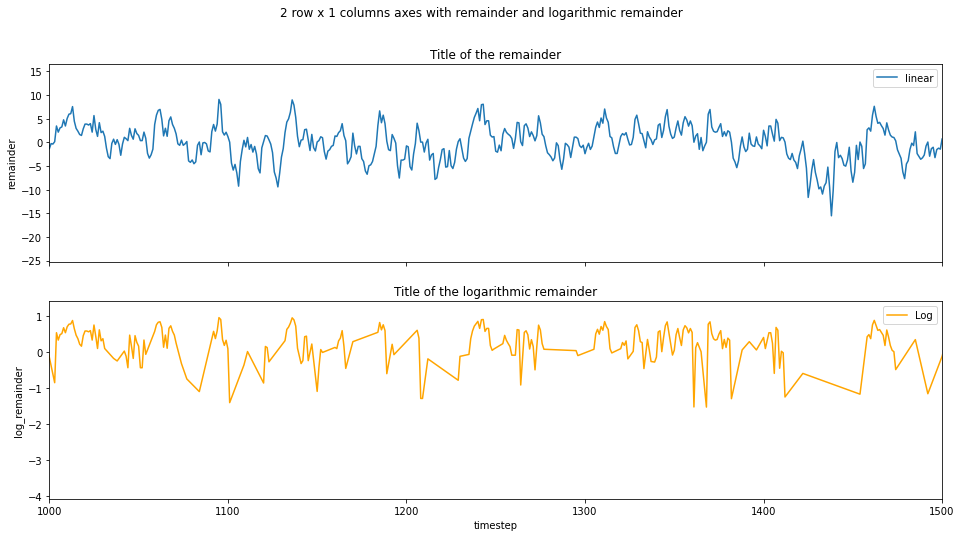

In [36]:
fig, axes = plt.subplots(2, 1,sharex=True, figsize = (16,8))
fig.suptitle('2 row x 1 columns axes with remainder and logarithmic remainder')
sns.lineplot(x = df['timestep'], y =df['remainder'], ax=axes[0],label='linear')
plt.xlim(1000,1500)
axes[0].set_title('Title of the remainder')

sns.lineplot(x = df['timestep'], y =df['log_remainder'], ax=axes[1],label='Log',color = 'orange')
plt.xlim(1000,1500)
axes[1].set_title('Title of the logarithmic remainder')


(1000, 1500)

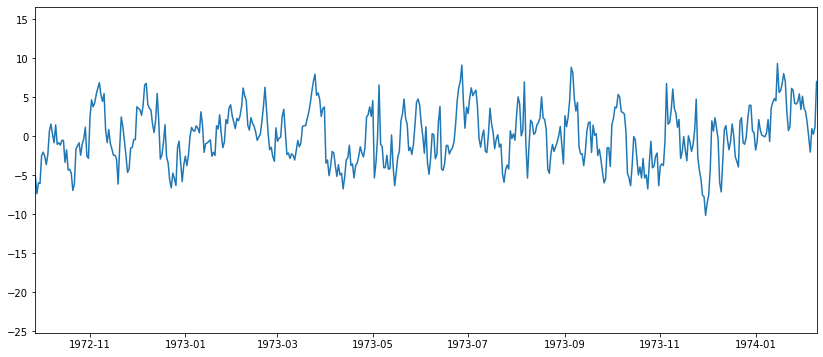

In [ ]:
plt.plot(df['remainder'])
plt.xlim(1000,1500)

- White noise

(1000.0, 1500.0)

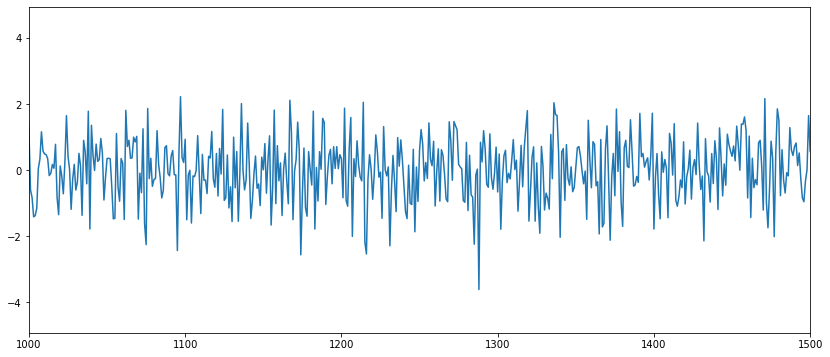

In [9]:
plt.plot(np.random.normal(0,1,52961))
plt.xlim(1000,1500)

- Autocorrelation

$MSE = \frac{1}{n} \sum_i^n (\hat{y} - y_i)^2$ 

$Var = \frac{1}{n} \sum_i^n (\bar{y} - y_i)^2$  # population variance

$ Covariance(y,x) = \frac{1}{n} \sum_i^n (\bar{y} - y_i) \cdot (\bar{x} - x_i) $

$ Correlation(y,x) = \frac{Cov(y,x)}{\sigma(y)\cdot\sigma(x)}$ Pearson Correlation, where $\sigma(x)$: standart deviation

In [15]:
df['lag1'] = df['remainder'].shift(1)
df['lag3'] = df['remainder'].shift(3)
df

,remainder,timestep,lag1,lag3
DATE,,,,
1876-01-01,3.075639,0,NaN,NaN
1876-01-02,3.375606,1,3.075639,NaN
1876-01-03,1.175574,2,3.375606,NaN
1876-01-04,-4.924459,3,1.175574,3.075639
1876-01-05,-8.924492,4,-4.924459,3.375606
...,...,...,...,...
2020-12-27,-0.615930,52956,-1.215898,4.684168
2020-12-28,0.584037,52957,-0.615930,0.484135
2020-12-29,0.084004,52958,0.584037,-1.215898


In [16]:
df.corr()  # see the correlation between the columns. 1 means perfect correlation

,remainder,timestep,lag1,lag3
remainder,1.000000e+00,-7.038754e-14,0.803688,0.463398
timestep,-7.038754e-14,1.000000e+00,-0.000003,-0.000006
lag1,8.036878e-01,-3.196870e-06,1.000000,0.599116
lag3,4.633977e-01,-6.261274e-06,0.599116,1.000000


AR(1) is the linear regression with the lag1 as X and the remainder as y

(0.0, 0.05)

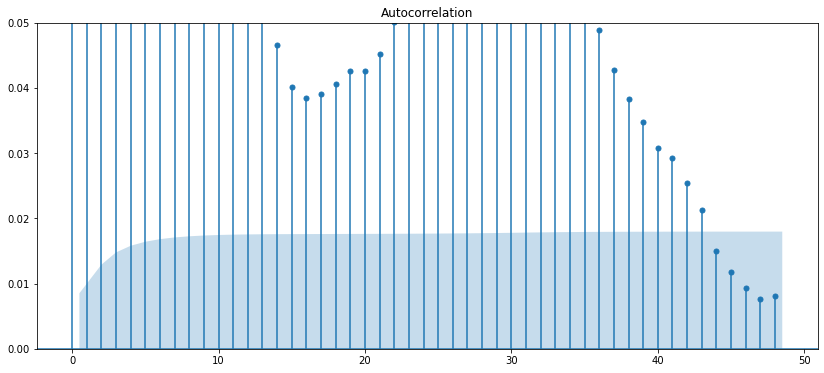

In [27]:
plot_acf(df['remainder']) # X axis are the lags
# autocorrelation function
plt.ylim(0,0.05)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


(-0.05, 0.05)

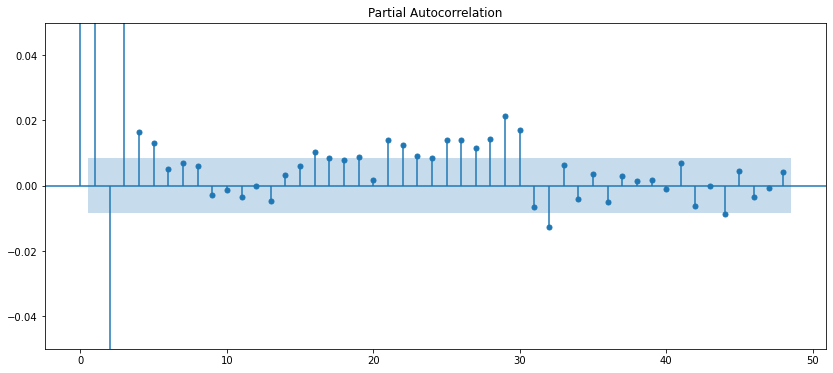

In [26]:
plot_pacf(df['remainder']) #partia autocorrelation function
plt.ylim(-0.05,0.05)

Train a linear model with a certain amoun of Lags that are given from PACF and predict:

In [22]:
ar_order = ar_select_order(df['remainder'], maxlag = 25)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [23]:
ar_order.ar_lags

[1, 2, 3, 4]